In [1]:
import quandl
quandl.ApiConfig.api_key = "CXJRhqCt_s4YnjCDfYq4"
import numpy as np
import pandas as pd

In [15]:
prices = quandl.get_table('SHARADAR/SEP', ticker=['AAPL', 'KO', 'NKE'], date={'gte':'2000-01-01', 'lte':'2018-12-31'}, paginate=True)

In [16]:
pivoted = prices.pivot(index='date', columns='ticker', values='close')
pivoted.head()

ticker,AAPL,KO,NKE
date,,,
2000-01-03,3.998,28.125,6.015
2000-01-04,3.661,28.220,5.688
2000-01-05,3.714,28.530,6.016
2000-01-06,3.393,28.500,5.985
2000-01-07,3.554,30.375,5.985


In [17]:
cov_matrix = pivoted.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

ticker,AAPL,KO,NKE
ticker,,,
AAPL,0.000720,0.000064,0.000131
KO,0.000064,0.000168,0.000075
NKE,0.000131,0.000075,0.000358


In [18]:
e_r = pivoted.resample('Y').last().pct_change().mean()
e_r

ticker
AAPL    0.458721
KO      0.036227
NKE     0.161956
dtype: float64

In [19]:
sd = pivoted.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
sd

ticker
AAPL    0.424182
KO      0.204990
NKE     0.299187
dtype: float64

In [20]:
assets = pd.concat([e_r, sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
ticker,,
AAPL,0.458721,0.424182
KO,0.036227,0.204990
NKE,0.161956,0.299187


In [27]:
p_ret = []
p_vol = []
p_weights = []

num_assets = len(pivoted.columns)
num_portfolios = 1000

In [28]:
for portfolio in range(num_portfolios):
    #weights = [.25, .75]
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, e_r)
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(250)
    p_vol.append(ann_sd)
weights

array([0.61411849, 0.16412359, 0.22175793])

In [29]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [32]:
for counter, symbol in enumerate(pivoted.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [33]:
portfolios  = pd.DataFrame(data)
portfolios.head()

,Returns,Volatility,AAPL weight,KO weight,NKE weight
0,0.292730,0.270909,0.499416,0.138670,0.361915
1,0.365244,0.331580,0.731887,0.110634,0.157480
2,0.267095,0.266841,0.373559,0.045491,0.580950
3,0.181015,0.205272,0.298322,0.552560,0.149118
4,0.135735,0.197842,0.225735,0.741368,0.032897


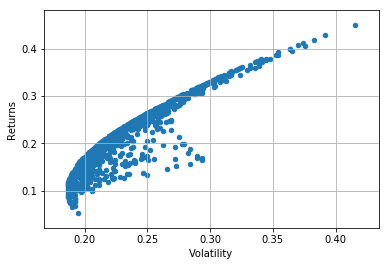

In [34]:
portfolios.plot.scatter(x='Volatility', y='Returns', grid=True)

In [12]:
op_space = pd.concat([portfolios, assets])
op_space

,Returns,Volatility
0,0.236147,0.271883
AAPL,0.458721,0.424182
NKE,0.161956,0.299187


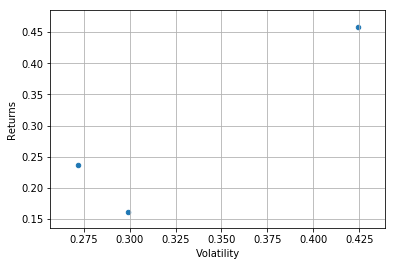

In [14]:
op_space.plot.scatter(x='Volatility', y='Returns', grid=True)